In [6]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# Display first few rows
print(df.head())

# Display column names
print(df.columns)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [8]:
pip install mlxtend



     ---------------------------------------- 1.4/1.4 MB 200.7 kB/s eta 0:00:00
     -------------------------------------- 11.2/11.2 MB 249.3 kB/s eta 0:00:00
     ------------------------------------ 301.8/301.8 kB 222.1 kB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.arima.model import ARIMA
















In [3]:
# Load dataset
df = pd.read_excel("Online Retail.xlsx")

In [4]:
# Data Preprocessing
df = df.dropna(subset=['CustomerID'])  # Remove rows with missing Customer IDs
df = df[df['Quantity'] > 0]  # Remove negative quantity values
df = df[df['UnitPrice'] > 0]  # Remove negative prices

df['Monetary'] = df['Quantity'] * df['UnitPrice']  # Calculate Monetary value

In [5]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [6]:
# RFM Analysis
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Monetary': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})


In [7]:
# Normalize data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [8]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

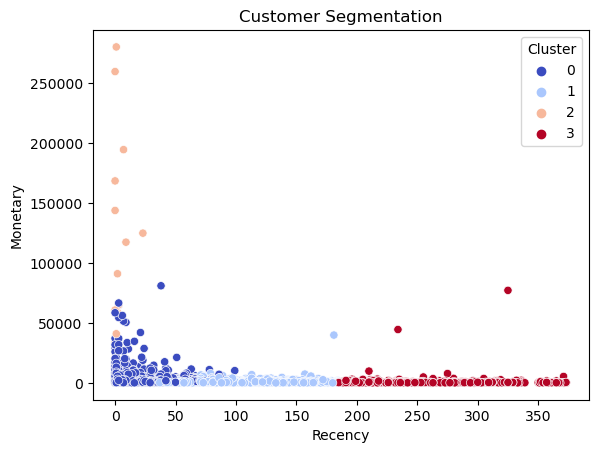

In [9]:
# Plot Clusters
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='coolwarm')
plt.title("Customer Segmentation")
plt.show()


In [10]:
# Market Basket Analysis
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
basket = df.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
rules = association_rules(apriori(basket, min_support=0.02, use_colnames=True), metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

C:\Users\siddh\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                          antecedents  \
0                         (ALARM CLOCK BAKELIKE RED )   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                         (ALARM CLOCK BAKELIKE RED )   
3                         (ALARM CLOCK BAKELIKE PINK)   
4                               (SPACEBOY LUNCH BOX )   
..                                                ...   
71  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
72  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
73                 (ROSES REGENCY TEACUP AND SAUCER )   
74                  (GREEN REGENCY TEACUP AND SAUCER)   
75                   (PINK REGENCY TEACUP AND SAUCER)   

                                          consequents   support  confidence  \
0                        (ALARM CLOCK BAKELIKE GREEN)  0.028599    0.604333   
1                         (ALARM CLOCK BAKELIKE RED )  0.028599    0.671736   
2                         (ALARM CLOCK BAKELIKE PINK)  0.021368    0.451539   

In [11]:
# Sales Forecasting
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
sales_data = df.groupby('InvoiceMonth')['Monetary'].sum().reset_index()
sales_data['InvoiceMonth'] = sales_data['InvoiceMonth'].astype(str)
sales_data['InvoiceMonth'] = pd.to_datetime(sales_data['InvoiceMonth'])
sales_data.set_index('InvoiceMonth', inplace=True)


In [12]:
# ARIMA Model
model = ARIMA(sales_data, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)


C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


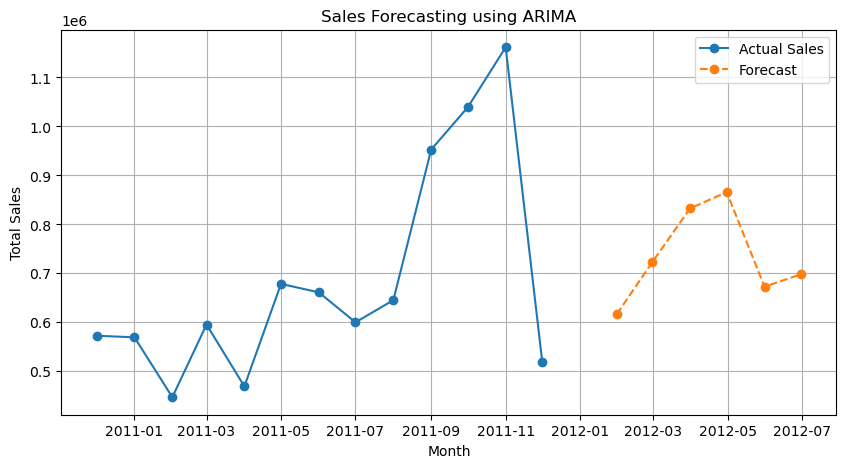

In [13]:
# Plot Sales Forecast
plt.figure(figsize=(10,5))
plt.plot(sales_data.index, sales_data, label="Actual Sales", marker='o')
plt.plot(pd.date_range(start=sales_data.index[-1], periods=7, freq='M')[1:], forecast, label="Forecast", linestyle="dashed", marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Forecasting using ARIMA")
plt.legend()
plt.grid()
plt.show()